In [2]:
import plot_SNVM_data as pSd
import SNVM_B_xyz_extraction as Sdp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib_scalebar.scalebar import ScaleBar
from math import ceil,floor,pi
import colorsys
import cv2
from skimage.util.shape import view_as_blocks
from skimage.io import imsave
from skimage.measure import profile_line
import scipy.ndimage
import os

In [ ]:
basepath = '/home/julisko/Seafile/My Library/SNVM/20230227_QZabre_Visit/Visit_Feb_2023'
#folder = '/2023-03-04/odmr_fast' #DyIG circle
#folderday = '/2023-03-04-17-16-26-odmr_fast'

folder = '/2023-03-04/odmr_fast' #DyIG overview extended features
folderday = '/2023-03-04-22-43-08-odmr_fast'

#folder = '/2023-03-05/odmr_fast' #DyIG extended features corner
#folderday = '/2023-03-05-10-54-54-odmr_fast'


file,metadata = pSd.ReadSNVMfile(basepath+folder+folderday)

data = pSd.ExtractData(file,datatype = 'odmr:mTesla')
data = pSd.AdjustDataToQS3(data)
fig, ax, im, cb, scalebar = pSd.PlotData(data, metadata, datalabel='Stray Field')#,minval=0.55,maxval=0.8)#,backgroundcorr='y')

ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)

#plt.show()

In [5]:
# List all items in basepath
basepath = '/home/julisko/Seafile/My Library/SNVM/20230922_QZabre_Visit_Garnets_SMMs_2DMag/230922_Visit_QZabre_DyCu5_CoCo4_FeF3_DyIG'
basepath_folders = []
basepath_foldernames = []

for i in range(len(os.listdir(basepath))):
    
    if os.path.isdir(basepath+'/'+sorted(os.listdir(basepath))[i]):
        basepath_folders.append(basepath+'/'+sorted(os.listdir(basepath))[i])
        basepath_foldernames.append(sorted(os.listdir(basepath))[i])
#print(basepath_folders)
print(basepath_foldernames)

#AFM_dayfolders = []
#Confocal_dayfolders = []
#Magnetometry_dayfolders =[]
#Pulse_exp_dayfolders = []

for i in range(len(basepath_folders)):
    if basepath_foldernames[i] =='AFM Scans':
        AFM_dayfolders = [basepath_folders[i]+'/'+s for s in sorted(os.listdir(basepath_folders[i]))]
        print('AFM_Scans','\n',sorted(os.listdir(basepath_folders[i])))
    if basepath_foldernames[i] =='Confocal Scans':
        Confocal_dayfolders = [basepath_folders[i]+'/'+s for s in sorted(os.listdir(basepath_folders[i]))]
        print('Confocal_Scans','\n',sorted(os.listdir(basepath_folders[i])))
        
    if basepath_foldernames[i] =='Magnetometry scans':
        Magnetometry_dayfolders = [basepath_folders[i]+'/'+s for s in sorted(os.listdir(basepath_folders[i]))]
        print('Magnetometry_Scans','\n',sorted(os.listdir(basepath_folders[i])))
        
    if basepath_foldernames[i] =='Pulse experiments':
        Pulse_exp_dayfolders = [basepath_folders[i]+'/'+s for s in sorted(os.listdir(basepath_folders[i]))]
        print('Pulse_Experiments','\n',sorted(os.listdir(basepath_folders[i])))
        

['AFM Scans', 'Confocal Scans', 'Magnetometry scans', 'Pulse Programs', 'Pulse experiments', 'Vector Magnet', 'logs']
AFM_Scans 
 ['2023-09-22', '2023-09-23', '2023-09-24']
Confocal_Scans 
 ['2023-09-22', '2023-09-23', '2023-09-24', '2023-09-26']
Magnetometry_Scans 
 ['2023-09-22', '2023-09-23', '2023-09-24', '2023-09-25', '2023-09-26']
Pulse_Experiments 
 ['2023-09-22', '2023-09-23', '2023-09-24', '2023-09-25', '2023-09-26']


In [ ]:
# Plot all Magnetometry images
Magnetometry_folders = []

for i in range(len(Magnetometry_dayfolders)):
    #print(AFM_dayfolders[i])
    #print(sorted(os.listdir(AFM_dayfolders[i])))
    try:
        Magnetometry_folders.append([Magnetometry_dayfolders[i]+'/odmr_pulsed/'+s 
                                     for s in sorted(os.listdir(Magnetometry_dayfolders[i]+'/odmr_pulsed'))])
    except:
        pass
print(Magnetometry_folders)
#print('\n')


savefolder = '/home/julisko/Seafile/My Library/SNVM/20230922_QZabre_Visit_Garnets_SMMs_2DMag/20230922_QZabre_Analysis/Direct_output'


for date_index in range(len(Magnetometry_folders)):
    for datafolder in Magnetometry_folders[date_index]:
        #print(datafolder)
        #print('\n')
        file, metadata = pSd.ReadSNVMfile(datafolder)
        B_ext = np.round(metadata['vectorMagnetSettings']['field_strength'],decimals=2)
        theta = np.round(metadata['vectorMagnetSettings']['theta'],decimals=2)
        phi = np.round(metadata['vectorMagnetSettings']['phi'],decimals=2)
        
        #print(file, '\n', metadata)
        magnetometry_preQS3 = pSd.ExtractData(file, datatype = 'odmr:mTesla0')
        magnetometry = pSd.AdjustDataToQS3(magnetometry_preQS3)
        for i in range(np.shape(magnetometry)[0]):
            magnetometry[i,:] = magnetometry[i,:]-np.nanmean(magnetometry[i,:])
        pSd.PlotData(magnetometry*1e3, metadata, datalabel = 'Stray Field (µT)',minval=-5, maxval = 5)#,backgroundcorr='x')#, 
        
        plt.title('B_ext='+str(B_ext)+r'mT, $\theta$ = '+str(theta) + r', $\varphi$ = '+str(phi))
        plt.tight_layout()
        #plt.savefig(savefolder+'/'+datafolder[-31:]+'_mT.png',dpi=200,transparent=True)
        print(savefolder+'/'+datafolder[-31:]+'_mT.png')
        plt.show()
        
        AFM_preQS3 = pSd.ExtractData(file, datatype = 'afm:height')
        AFM = pSd.AdjustDataToQS3(AFM_preQS3)
        pSd.PlotData(AFM, metadata, zscaling = 1e9, datalabel = 'Height (nm)', backgroundcorr='x', cmap = 'copper')
        plt.title('B_ext='+str(B_ext)+r'mT, $\theta$ = '+str(theta) + r', $\varphi$ = '+str(phi))
        plt.tight_layout()
        print(savefolder+'/'+datafolder[-31:]+'_topo.png')
        #plt.savefig(savefolder+'/'+datafolder[-31:]+'_topo.png',dpi=200,transparent=True)
        print('\n')
        plt.show()




/home/julisko/Seafile/My Library/SNVM/20230922_QZabre_Visit_Garnets_SMMs_2DMag/20230922_QZabre_Analysis/Direct_output/2023-09-25-18-11-28-odmr_pulsed_mT.png


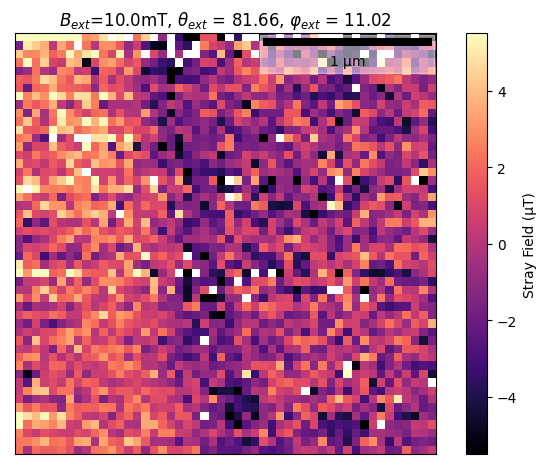

/home/julisko/Seafile/My Library/SNVM/20230922_QZabre_Visit_Garnets_SMMs_2DMag/20230922_QZabre_Analysis/Direct_output/2023-09-25-18-11-28-odmr_pulsed_topo.png




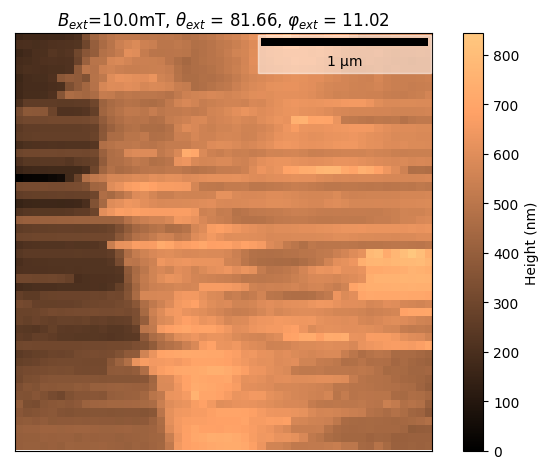

4 28


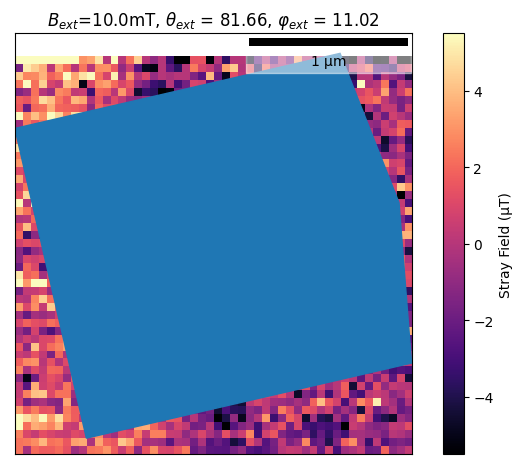

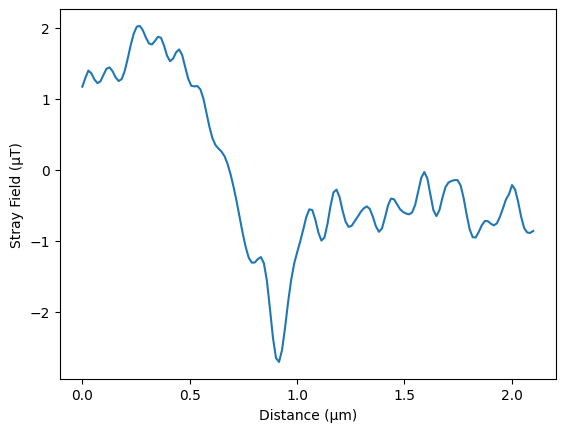

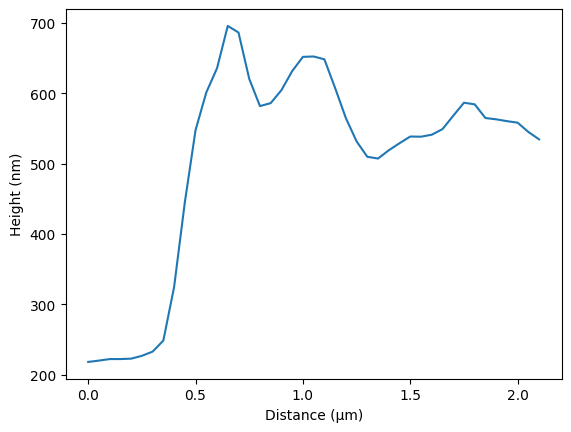

In [33]:
#2023-09-25-18-11-28-odmr_pulsed

datafolder = '/home/julisko/Seafile/My Library/SNVM/20230922_QZabre_Visit_Garnets_SMMs_2DMag/230922_Visit_QZabre_DyCu5_CoCo4_FeF3_DyIG/Magnetometry scans/2023-09-25/odmr_pulsed/2023-09-25-18-11-28-odmr_pulsed'
savefolder = '/home/julisko/Seafile/My Library/SNVM/20230922_QZabre_Visit_Garnets_SMMs_2DMag/20230922_QZabre_Analysis/Direct_output'


file, metadata = pSd.ReadSNVMfile(datafolder)
B_ext = np.round(metadata['vectorMagnetSettings']['field_strength'],decimals=2)
theta = np.round(metadata['vectorMagnetSettings']['theta'],decimals=2)
phi = np.round(metadata['vectorMagnetSettings']['phi'],decimals=2)

lc_mT_anchors = [4,28]
x0_linecut = lc_mT_anchors[0]
y0_linecut = lc_mT_anchors[1]
angle_linecut = 13 #deg # 13deg taken from line along flake topo
length=42 #px
width = 40
num=50

px_shape = metadata['resolution'] #shape in px
actualshape = metadata['rect']['size'] #get shape in m
len_per_px = actualshape[0]/px_shape[0]*1e6 #um/px
linecut_actual_len = length * len_per_px #length of linecut in um


angle_linecut_rad = angle_linecut*2*np.pi/360

x1_linecut = x0_linecut+length*np.sin(angle_linecut_rad+np.pi/2)
y1_linecut = y0_linecut+length*np.cos(angle_linecut_rad+np.pi/2)


#print(file, '\n', metadata)
magnetometry_preQS3 = pSd.ExtractData(file, datatype = 'odmr:mTesla0')
magnetometry = pSd.AdjustDataToQS3(magnetometry_preQS3)
for i in range(np.shape(magnetometry)[0]):
    magnetometry[i,:] = magnetometry[i,:]-np.nanmean(magnetometry[i,:])
fig_mT, ax_mT, im_mT, cb_mT, scalebar_mT = pSd.PlotData(magnetometry*1e3, metadata, datalabel = 'Stray Field (µT)',minval=-5.5, maxval = 5.5)#,backgroundcorr='x')#, 

#ax_mT.arrow(x0_linecut,y0_linecut,x1_linecut-x0_linecut,y1_linecut-y0_linecut,width = width, 
#            head_width = width, head_length = 3, color='C0')

plt.title(r'$B_{ext}$='+str(B_ext)+r'mT, $\theta_{ext}$ = '+str(theta) + r', $\varphi_{ext}$ = '+str(phi))
plt.tight_layout()
#plt.savefig(savefolder+'/'+datafolder[-31:]+'_mT.png',dpi=200,transparent=True)
print(savefolder+'/'+datafolder[-31:]+'_mT.png')
plt.show()

AFM_preQS3 = pSd.ExtractData(file, datatype = 'afm:height')
AFM = pSd.AdjustDataToQS3(AFM_preQS3)
for i in range(np.shape(AFM)[0]):
    AFM[i,:] = AFM[i,:]-np.nanmean(AFM[i,:])
AFM = AFM - np.nanmin(AFM)
fig_AFM, ax_AFM, im_AFM, cb_AFM, scalebar_AFM = pSd.PlotData(AFM, metadata, zscaling = 1e9, datalabel = 'Height (nm)', backgroundcorr=None, cmap = 'copper')

#ax_AFM.arrow(x0_linecut,y0_linecut,x1_linecut-x0_linecut,y1_linecut-y0_linecut,width = width, 
#            head_width = width, head_length = 3, color='C0')

plt.title(r'$B_{ext}$='+str(B_ext)+r'mT, $\theta_{ext}$ = '+str(theta) + r', $\varphi_{ext}$ = '+str(phi))
plt.tight_layout()
print(savefolder+'/'+datafolder[-31:]+'_topo.png')
#plt.savefig(savefolder+'/'+datafolder[-31:]+'_topo.png',dpi=200,transparent=True)
print('\n')

plt.show()

print(*lc_mT_anchors)

for i in range(np.shape(magnetometry)[0]):
    for j in range(np.shape(magnetometry)[1]):
        if np.isnan(magnetometry[i,j]):
            magnetometry[i,j] = 0

fig_mT, ax_mT, im_mT, cb_mT, scalebar_mT = pSd.PlotData(magnetometry*1e3, metadata, datalabel = 'Stray Field (µT)',minval=-5.5, maxval = 5.5)#,backgroundcorr='x')#, 

ax_mT.arrow(x0_linecut,y0_linecut,x1_linecut-x0_linecut,y1_linecut-y0_linecut,width = width, 
            head_width = width, head_length = 3, color='C0')

plt.title(r'$B_{ext}$='+str(B_ext)+r'mT, $\theta_{ext}$ = '+str(theta) + r', $\varphi_{ext}$ = '+str(phi))
plt.tight_layout()
#plt.savefig(savefolder+'/'+datafolder[-31:]+'_mT.png',dpi=200,transparent=True)
#print(savefolder+'/'+datafolder[-31:]+'_mT.png')
plt.show()


lc_mT, lc_mT_array = pSd.ExtractLinecut(magnetometry, metadata, x0_linecut, y0_linecut, x1_linecut, y1_linecut, method = 'map_coordinates', line_width=width)

fig_lc_mT, ax_lc_mT = plt.subplots()
ax_lc_mT.plot(np.linspace(0,linecut_actual_len,num=len(lc_mT)),lc_mT*1e3)
ax_lc_mT.set_ylabel('Stray Field (µT)')
ax_lc_mT.set_xlabel('Distance (µm)')

#lc_mT,lc_array_mT = pSd.ExtractLinecut(magnetometry, metadata, x0_linecut, y0_linecut, x1_linecut, y1_linecut, method = 'map_coordinates', line_width = width, num=num)

plt.show()


lc_AFM = pSd.ExtractLinecut(AFM, metadata, x0_linecut, y0_linecut, x1_linecut, y1_linecut, method = 'profile_line')

fig_lc_AFM, ax_lc_AFM = plt.subplots()
ax_lc_AFM.plot(np.linspace(0,linecut_actual_len,num=len(lc_AFM)),lc_AFM*1e9)
ax_lc_AFM.set_ylabel('Height (nm)')
ax_lc_AFM.set_xlabel('Distance (µm)')


plt.show()